### P051 随机森林 - 训练随机森林分类模型

#### 集成学习(ensemble learning)它本身不是一个单独的机器学习算法，而是通过构建并结合多个机器学习器来完成学习任务

### 集成学习之bagging

### 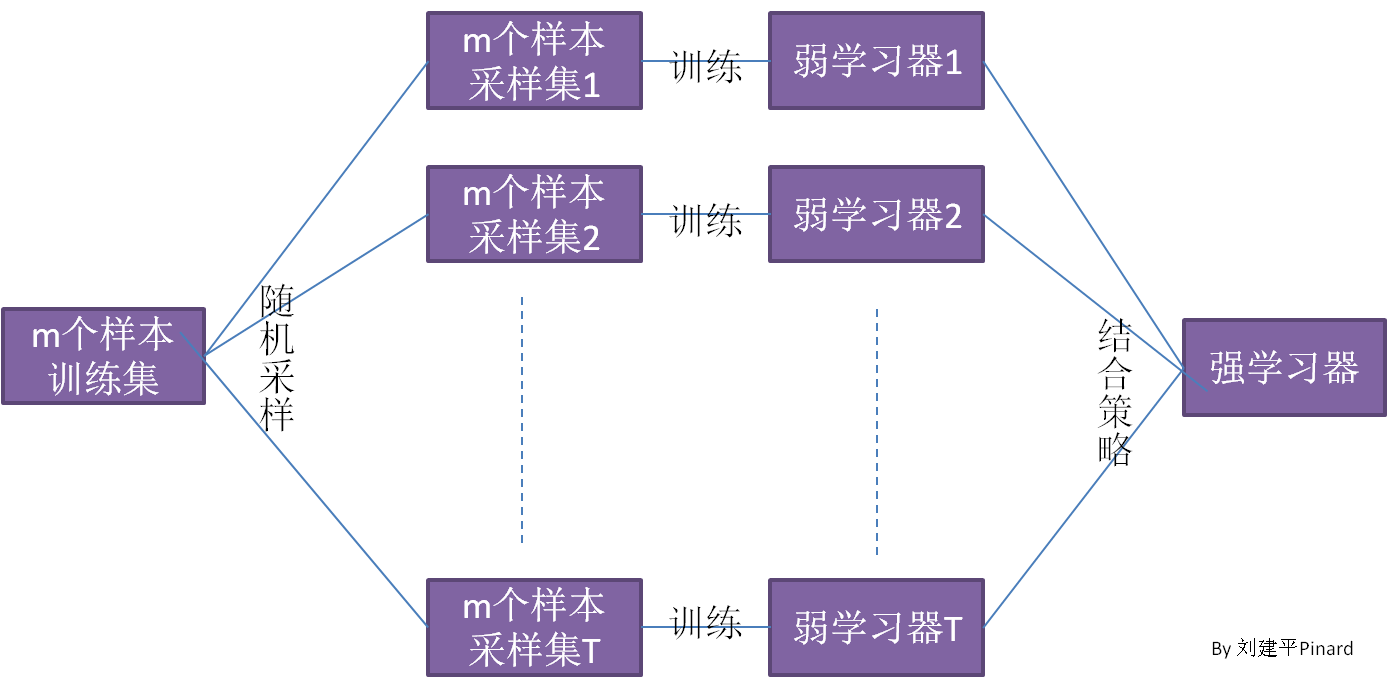

#### 从上图可以看出，bagging的个体弱学习器的训练集是通过随机采样得到的。通过T次的随机采样，我们就可以得到T个采样集，对于这T个采样集，我们可以分别独立的训练出T个弱学习器，再对这T个弱学习器通过集合策略来得到最终的强学习器。

对于这里的随机采样一般采用的是自助采样法（Bootstrap sampling）,即对于m个样本的原始训练集，我们每次先随机采集一个样本放入采样集，接着把该
样本放回，也就是说下次采样时该样本仍有可能被采集到，这样采集m次，最终可以得到m个样本的采样集，由于是随机采样，这样每次的采样集是和原始训
练集不同的，和其他采样集也是不同的，这样得到多个不同的弱学习器。

#### 随机森林算法
　　　　理解了bagging算法，随机森林(Random Forest,以下简称RF)就好理解了。它是Bagging算法的进化版，也就是说，它的思想仍然是bagging,但是进行了独有的改进。我们现在就来看看RF算法改进了什么。　　　

　　　　首先，RF使用了CART决策树作为弱学习器，这让我们想到了梯度提升树GBDT。第二，在使用决策树的基础上，RF对决策树的建立做了改进，对于普通的决策树，我们会在节点上所有的n个样本特征中选择一个最优的特征来做决策树的左右子树划分，但是RF通过随机选择节点上的一部分样本特征，这个数字小于n，假设为nsub，然后在这些随机选择的nsub个样本特征中，选择一个最优的特征来做决策树的左右子树划分。这样进一步增强了模型的泛化能力。　　　　

　　　　如果nsub=n，则此时RF的CART决策树和普通的CART决策树没有区别。nsub越小，则模型约健壮，当然此时对于训练集的拟合程度会变差。也就是说nsub越小，模型的方差会减小，但是偏倚会增大。在实际案例中，一般会通过交叉验证调参获取一个合适的nsub的值。

　　　　除了上面两点，RF和普通的bagging算法没有什么不同， 下面简单总结下RF的算法。

　　　　输入为样本集D={(x,y1),(x2,y2),...(xm,ym)}，弱分类器迭代次数T。

　　　　输出为最终的强分类器f(x)
　　　　1）对于t=1,2...,T:

　　　　　　a)对训练集进行第t次随机采样，共采集m次，得到包含m个样本的采样集Dt
      
　　　　　　b)用采样集Dt训练第t个决策树模型Gt(x)，在训练决策树模型的节点的时候， 在节点上所有的样本特征中选择一部分样本特征， 在这些随机选择的部分样本特征中选择一个最优的特征来做决策树的左右子树划分

　　　　2) 如果是分类算法预测，则T个弱学习器投出最多票数的类别或者类别之一为最终类别。如果是回归算法，T个弱学习器得到的回归结果进行算术平均得到的值为最终的模型输出。

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import make_moons

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
np.random.seed(42)

#### 使用make_moons函数构造数据，样本2000个，加入0.25的噪声

In [7]:
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)

In [10]:
data, target = raw_data[0], raw_data[1]

In [11]:
data.shape, target.shape

((2000, 2), (2000,))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, target)

In [13]:
classifer = RandomForestClassifier(random_state=42)

In [14]:
classifer.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
acc = classifer.score(x_test, y_test)

In [16]:
acc

0.93

### P052 随机森林 - 网格搜索获取最优参数

In [17]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [6, 7, 8],
    "min_samples_leaf" : [4, 5]
}

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid_search = GridSearchCV(classifer, param_grid=param_grid,
                          n_jobs=-1, scoring='accuracy', cv=2)

In [20]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8], 'min_samples_leaf': [4, 5]},
             scoring='accuracy')

In [21]:
acc = grid_search.score(x_test, y_test)
acc

0.932

In [22]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4}

#### RF的主要优点有：

　　　　1） 训练可以高度并行化，对于大数据时代的大样本训练速度有优势。

　　　　2） 由于可以随机选择决策树节点划分特征，这样在样本特征维度很高的时候，仍然能高效的训练模型。

　　　　3） 在训练后，可以给出各个特征对于输出的重要性

　　　　4） 由于采用了随机采样，训练出的模型的方差小，泛化能力强。

　　　　5） 相对于Boosting系列的Adaboost和GBDT， RF实现比较简单。

　　　　6） 对部分特征缺失不敏感。

#### RF的主要缺点有：

　　　　1）在某些噪音比较大的样本集上，RF模型容易陷入过拟合。

　　　　2) 取值划分比较多的特征容易对RF的决策产生更大的影响，从而影响拟合的模型的效果。